## 1. 분석 준비

In [1]:
setwd("../data/")
options(repr.plot.width = 12, repr.plot.height = 6)

In [2]:
# install.packages("ggplot2")
# install.packages("lmtest")

In [3]:
library(ggplot2)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [313]:
theme_set(theme_grey(base_family="Gulim"))

In [309]:
install.packages("extrafont")
library(extrafont)
font_import()
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
 : DejaVuSansMono-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf
 : DejaVuSansMono already registered in fonts database. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf
 : DejaVuSerif-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
 : DejaVuSerif already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /root/anaconda3/envs/r_env/lib/R/library/extrafontdb/metrics



## 2. 광고료와 총판매액 분석

### A. data

In [4]:
dt <- data.frame(x = c(4,8,9,8,8,12,6,10,6,9),
                 y = c(9,20,22,15,17,30,18,25,10,20))
dt

x,y
<dbl>,<dbl>
4,9
8,20
9,22
8,15
8,17
12,30
6,18
10,25
6,10


### B. 산점도 그리기

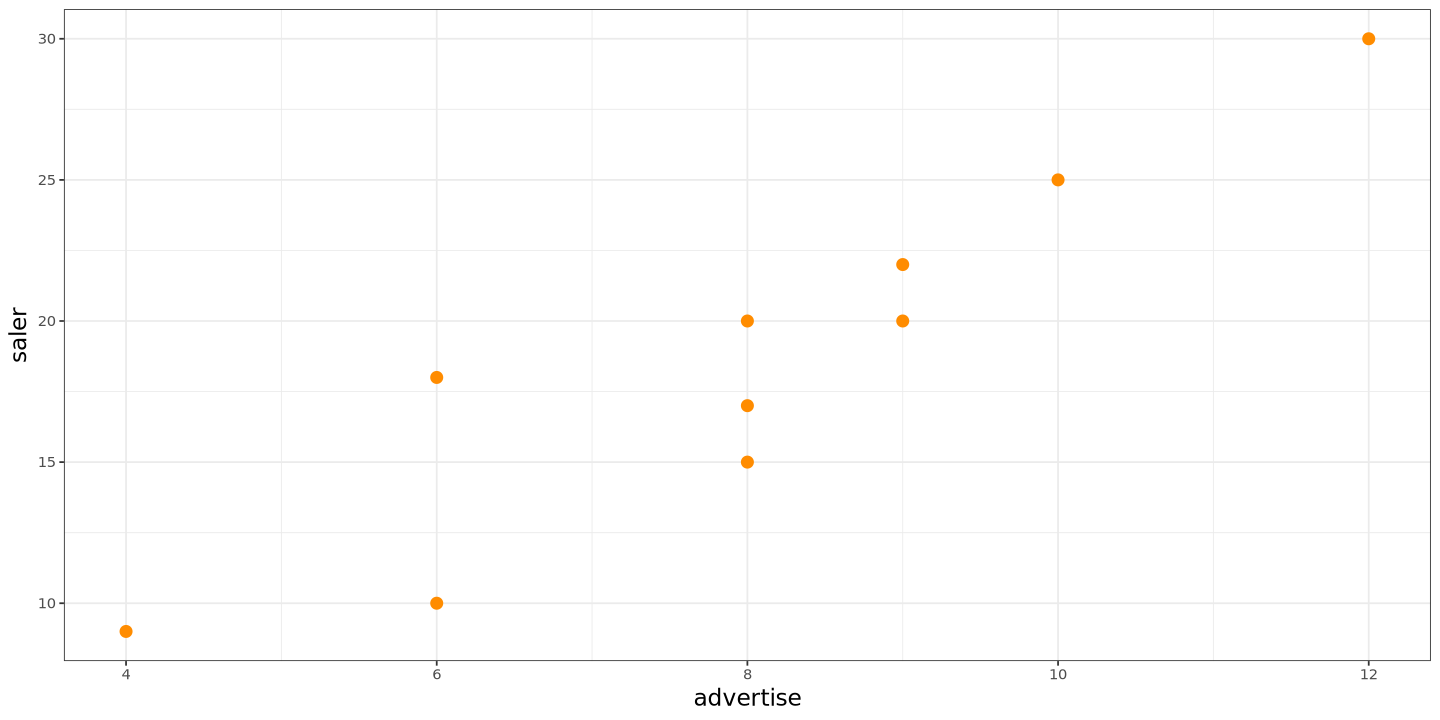

In [5]:
ggplot(dt, aes(x, y)) + geom_point(col = "darkorange", size = 3) + xlab("advertise") + ylab("saler") + theme_bw(base_family = "NanumGothic") + theme(axis.title = element_text(size = 14))

### C. 상관관계 분석

In [6]:
cor(dt$x, dt$y)  ## 상관계수

[1] 0.9218123

$H_0 : \rho_{xy} = 0 ~ ~  vs. ~ ~  H_1 : \rho_{xy} ≠ 0$

In [7]:
cor.test(dt$x, dt$y)  ## 피어슨 상관계수 검정


	Pearson's product-moment correlation

data:  dt$x and dt$y
t = 6.7261, df = 8, p-value = 0.0001487
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6963398 0.9816763
sample estimates:
      cor 
0.9218123 


> x와 y는 상관관계가 있다.

### D. 회귀모형 적합

In [8]:
model <- lm(y~x, dt)
model


Call:
lm(formula = y ~ x, data = dt)

Coefficients:
(Intercept)            x  
     -2.270        2.609  


In [9]:
model$coefficients  ## coef(model)

(Intercept)           x 
  -2.269565    2.608696

In [10]:
ls(model)  ## names(model)

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

> 따라서 추정된 회귀직선은 $\hat{y} = -2.270 + 2.609x$

In [11]:
summary(model)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.600 -1.502  0.813  1.128  4.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2696     3.2123  -0.707 0.499926    
x             2.6087     0.3878   6.726 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.631 on 8 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.831 
F-statistic: 45.24 on 1 and 8 DF,  p-value: 0.0001487


### E. 추정된 값 : $\hat{y_i}$

In [12]:
coef(model)[1] + coef(model)[2]*dt$x  ## 직접 계산

[1]  8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609
 [8] 23.817391 13.382609 21.208696

In [13]:
model$fitted.values  ## fitted.values(model) or fitted(model)

1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

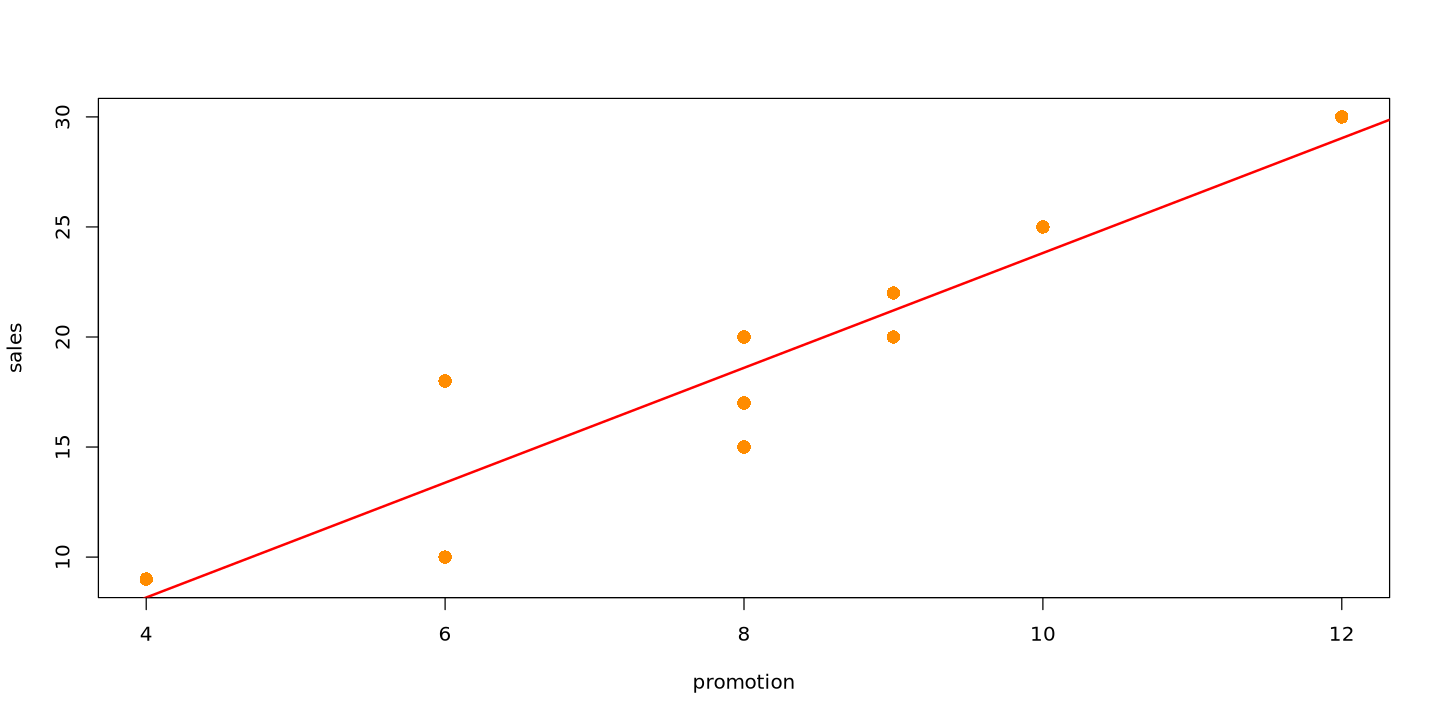

In [14]:
plot(dt$x, dt$y, pch = 16, cex = 1.5, col = "darkorange", xlab = "promotion", ylab = "sales")
abline(model, col = "red", lwd = 2)

### F. 회귀모형의 유의성 검정(F검정)

In [15]:
names(summary(model))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [16]:
print(summary(model)$fstatistic)
print(qf(0.95, 1, 8))

   value    numdf    dendf 
45.24034  1.00000  8.00000 
[1] 5.317655


In [17]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,313.04348,313.043478,45.24034,0.0001486582
Residuals,8,55.35652,6.919565,NA,NA


> p-value가 상당히 낮으므로 귀무가설을 기각, 즉, 적합된 회귀직선은 유의하다.

### G. 회귀계수의 유의성 검정(t검정)

In [18]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


> 유의수준 $\alpha = 0.05$에서 절편은 유의하지 않고, 회귀계수는 유의하다.

### H. 모형의 적합도

In [22]:
c(summary(model)$r.squared, summary(model)$adj.r.squared)

[1] 0.8497380 0.8309552

`-` 회귀계수에 대한 추론

* $\hat{\beta_1}$에 대한 추론 : confidence interval

수제로 구하기

In [27]:
qt(0.025, length(dt$x)-2)

[1] -2.306004

In [23]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


In [32]:
model$coef[2] + qt(0.025, length(dt$x)-2) * summary(model)$coef[2,2]
model$coef[2] + qt(0.975, length(dt$x)-2) * summary(model)$coef[2,2]

x 
1.714319

x 
3.503073

함수를 이용하여 구하기

In [33]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-9.677252,5.138122
x,1.714319,3.503073


* 가설 검정

$H_0 : \beta_1 = \beta_{1_0} ~ vs. ~ H1 : \beta_1 ≠ \beta_{1_0}$

ex) $\beta_{1_0} = 2$라면

In [38]:
t = (model$coef[2] - 2)/summary(model)$coef[2,2]
t

x 
1.569422

In [34]:
qt(0.975, 10-2)

[1] 2.306004

> t값이 1.57로 기각역에 속하지 않는다. 따라서 유의수준 $\alpha = 0.05$에서 $\beta_1$은 2가 아니다.

* $\hat{\beta_0}$에 대한 추론 : 동일

In [40]:
confint(model, level = 0.95)[1,]

2.5 %    97.5 % 
-9.677252  5.138122

`-` 평균반응, 개별 y값의 추정

In [44]:
model$coefficients[1] + model$coef[2]*4.5  ## 점추정치

(Intercept) 
   9.469565

In [47]:
predict(model, newdata = data.frame(x = 4.5))

1 
9.469565

> 점추정치의 경우 오차의 기댓값이 0이기 때문에 동일하게 된다.

`-` 신뢰구간의 경우

In [52]:
predict(model, newdata = data.frame(x = 4.5),
       interval = "confidence",
       level = 0.95)  ## 평균반응

,fit,lwr,upr
1,9.469565,5.79826,13.14087


In [66]:
predict(model, newdata = data.frame(x = 4.5),
       interval = "prediction",
       level = 0.95)  ## 개별 y

lwr       upr 
 2.379125 16.560006

> 개별 y의 경우 오차까지 감안을 해야 하기 때문에 구간의 크기가 더 커진다.

In [88]:
dt_pred <- data.frame(x = c(1:12, 20, 25, 50),
                     predict(model, newdata = data.frame(x = c(1:12, 20, 25, 50)),
                            interval = "confidence", level = 0.95),
                     predict(model, newdata = data.frame(x = c(1:12, 20, 25, 50)),
                            interval = "prediction", level = 0.95)[,2:3])
colnames(dt_pred)[5:6] <- c("plwr", "pupr")
dt_pred

,x,fit,lwr,upr,plwr,pupr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3391304,-6.2087835,6.887044,-8.5867330,9.264994
2,2,2.9478261,-2.7509762,8.646628,-5.3751666,11.270819
3,3,5.5565217,0.6905854,10.422458,-2.2199297,13.332973
4,4,8.1652174,4.1058891,12.224546,0.8663128,15.464122
5,5,10.7739130,7.4756140,14.072212,3.8692308,17.678595
6,6,13.3826087,10.7597808,16.005437,6.7738957,19.991322
7,7,15.9913043,13.8748223,18.107786,9.5667143,22.415894
8,8,18.6000000,16.6817753,20.518225,12.2379683,24.962032
9,9,21.2086957,19.0922136,23.325178,14.7841056,27.633286


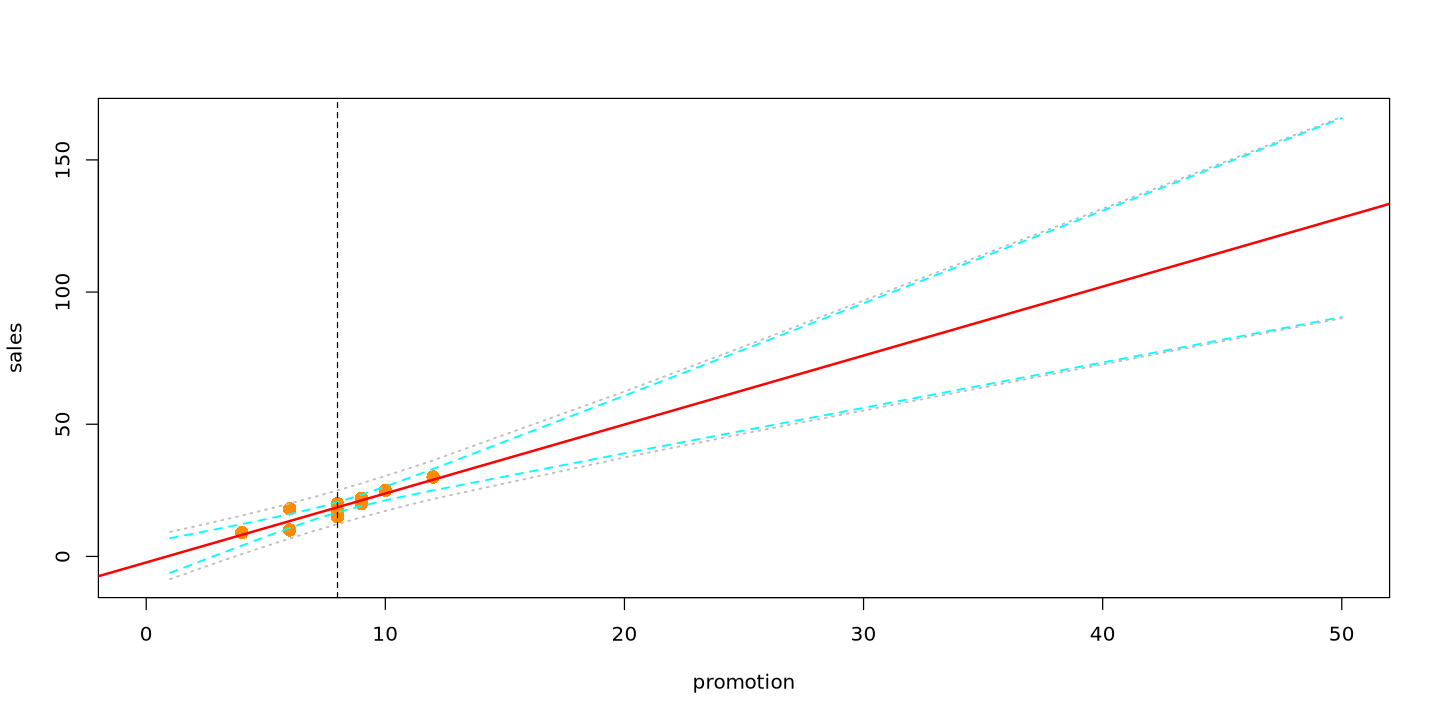

In [99]:
plot(y~x, dt, pch = 16, col = "darkorange", cex = 1.5, xlab = "promotion", ylab = "sales", xlim = c(0,50), ylim = c(min(dt_pred$plwr), max(dt_pred$pupr)))
abline(model, col = "red", lwd = 2)

lines(dt_pred$x, dt_pred$lwr, lty = 2, lwd = 1.5, col = "cyan")
lines(dt_pred$x, dt_pred$upr, lty = 2, lwd = 1.5, col = "cyan")
lines(dt_pred$x, dt_pred$plwr, lty = 3, lwd = 1.5, col = "grey")
lines(dt_pred$x, dt_pred$pupr, lty = 3, lwd = 1.5, col = "grey")

abline(v = mean(dt$x), lty = 2)

`geom_smooth()` using formula = 'y ~ x'


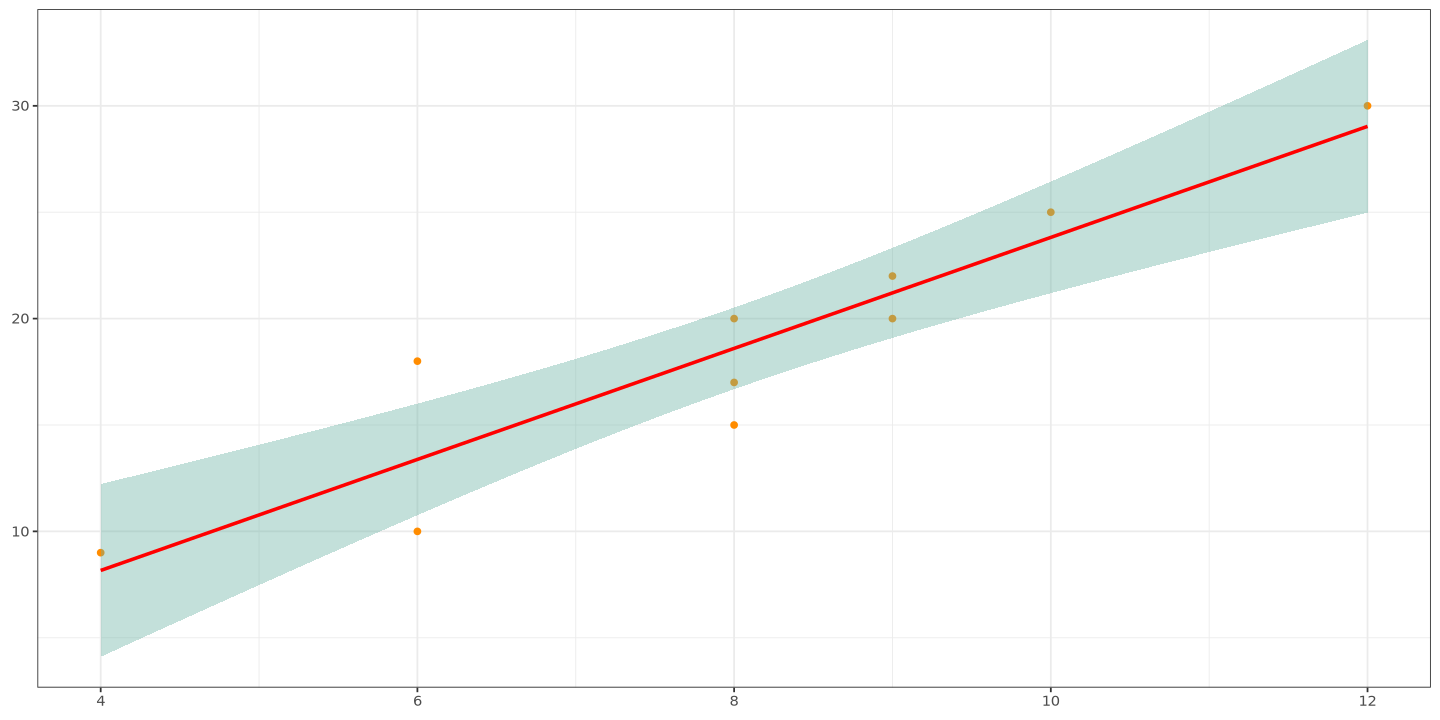

In [107]:
ggplot(dt, aes(x, y)) +
 geom_point(col = "darkorange") +
 geom_smooth(method = "lm", color="red", fill="#69b3a2", se=TRUE) +
 theme_bw() +
 theme(axis.title = element_blank())

## 3. 잔차분석

In [108]:
dt

x,y
<dbl>,<dbl>
4,9
8,20
9,22
8,15
8,17
12,30
6,18
10,25
6,10


### A. 잔차 구하기

In [118]:
dt$y - fitted(model)  ## 직접 구하기

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

In [111]:
ls(summary(model))

[1] "adj.r.squared" "aliased"       "call"          "coefficients" 
 [5] "cov.unscaled"  "df"            "fstatistic"    "r.squared"    
 [9] "residuals"     "sigma"         "terms"

In [115]:
summary(model)$resid

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

In [119]:
resid = summary(model)$resid

### B. 잔차 그림

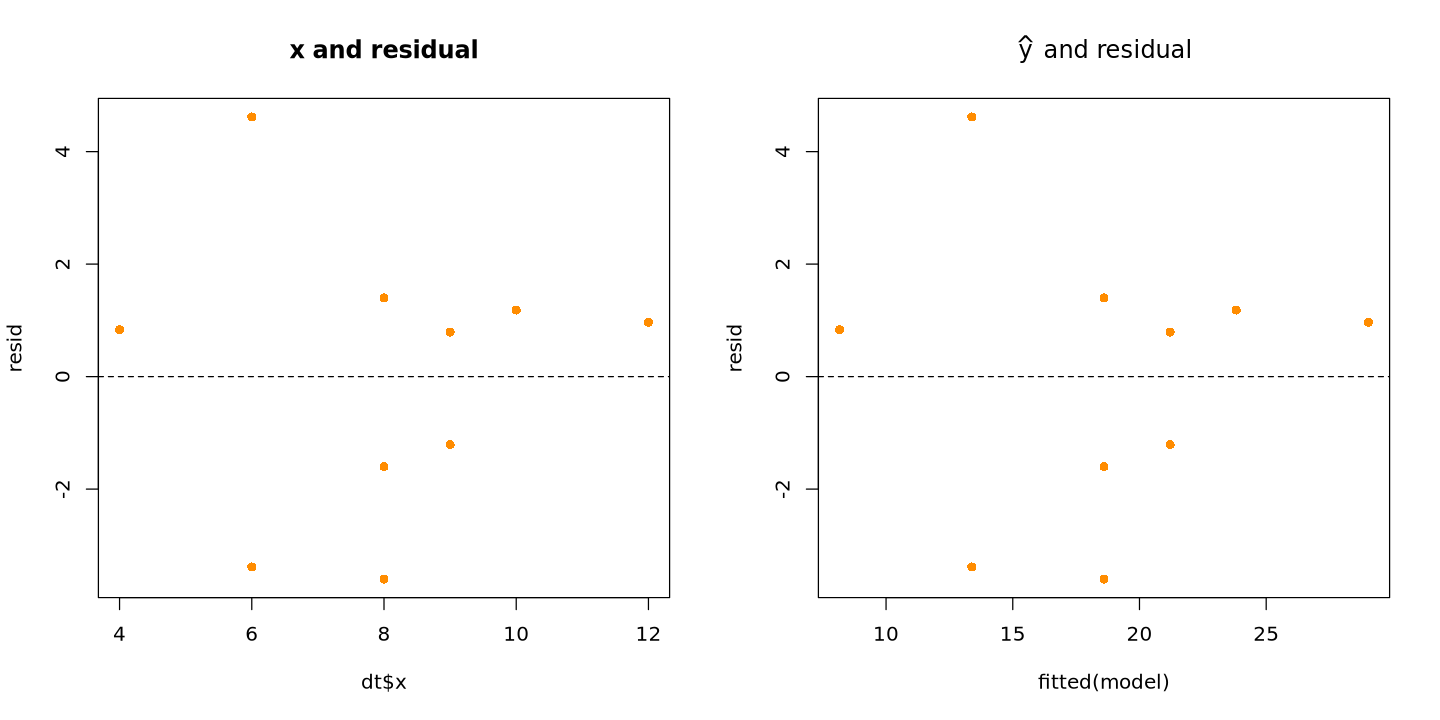

In [137]:
par(mfrow = c(1,2))
plot(dt$x, resid, pch = 16, col = "darkorange", main = "x and residual")
abline(h = 0, lty = 2)
plot(fitted(model), resid, pch = 16, col = "darkorange", main = expression(paste(hat(y), " and residual")))
abline(h = 0, lty = 2)

### C. 모형의 타당성 검토

* 선형성 : 잔차그림이 0을 중심으로 대칭
* 등분산성 : 잔차의 변동이 x값에 상관없이 일정함
* 정규성 : 0을 중심으로 대칭(선형성)이고 등분산성을 만족하며 $2\sigma$내에 95%, $3\sigma$내에 99% 정도의 값이 들어있음. (shapiro.test())
* 독립성 : 특정한 규칙 없이 랜덤하게 퍼져있음. (dwtest)

In [139]:
rstandard(model)

1          2          3          4          5          6          7 
 0.4270670  0.5610058  0.3209906 -1.4425864 -0.6411495  0.4937963  1.9467061 
         8          9         10 
 0.4985914 -1.4261180 -0.4903044

In [140]:
rstudent(model)

1          2          3          4          5          6          7 
 0.4041178  0.5354104  0.3022117 -1.5688042 -0.6157695  0.4691085  2.5101003 
         8          9         10 
 0.4738093 -1.5447423 -0.4656881

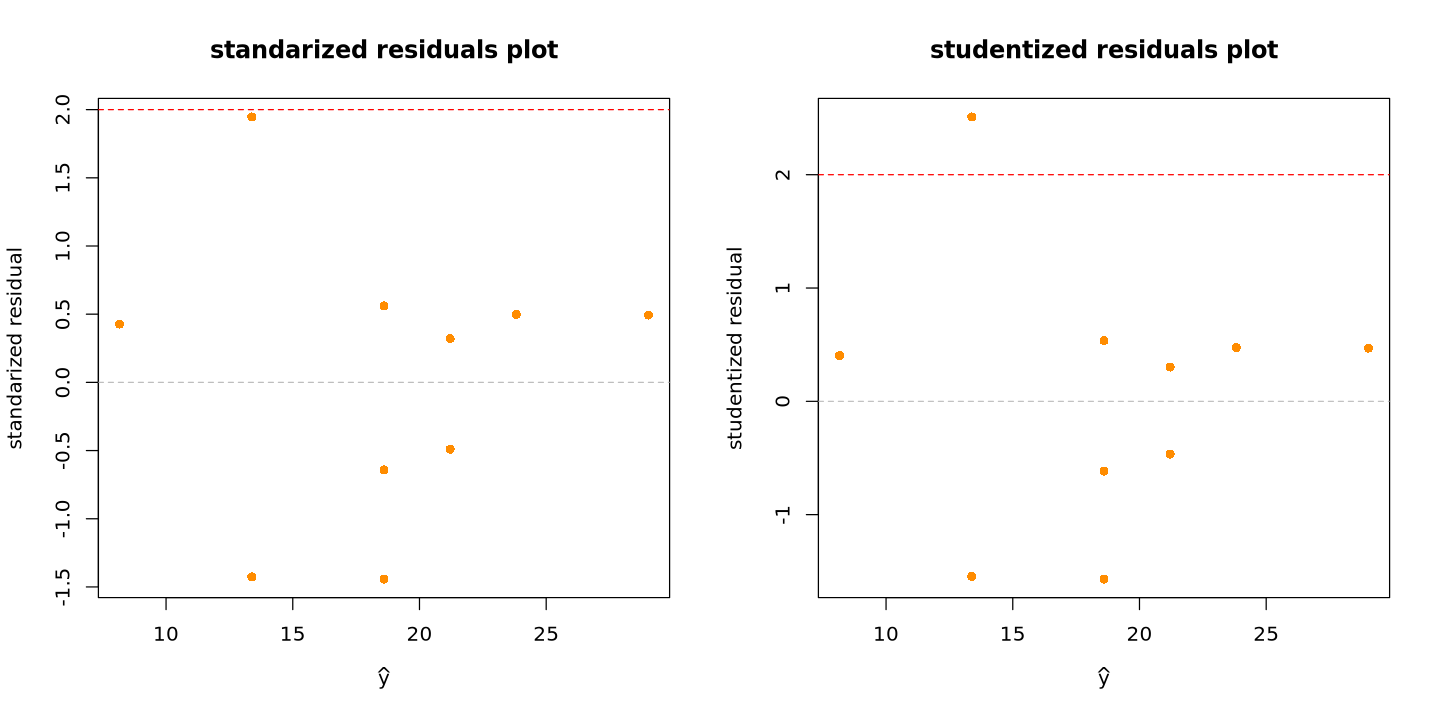

In [151]:
par(mfrow = c(1,2))
plot(rstandard(model)~fitted(model), pch = 16, col = "darkorange", xlab = expression(hat(y)), ylab = "standarized residual", main = "standarized residuals plot")
abline(h = c(-2, 0, 2), lty = 2, col = c("red", "grey", "red"))
plot(rstudent(model)~fitted(model), pch = 16, col = "darkorange", xlab = expression(hat(y)), ylab = "studentized residual", main = "studentized residuals plot")
abline(h = c(-2, 0, 2), lty = 2, col = c("red", "grey", "red"))
par(mfrow = c(1,1))

> 잔차그림으로 보아 이정도면 등분산성을 만족합니다... 끝. (분석자의 경험에 의존함...)

* 또는 잔차의 히스토그램 / QQ플랏 이용

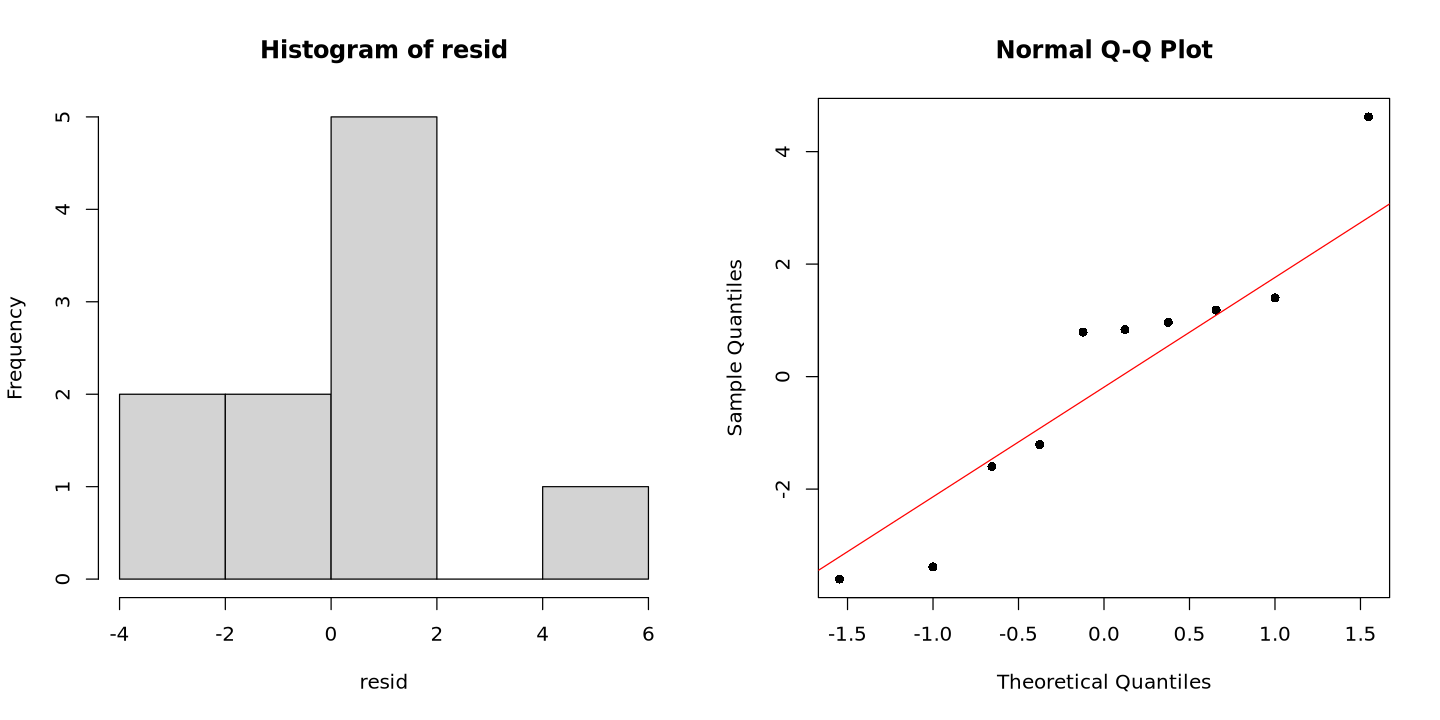

In [156]:
par(mfrow = c(1,2))

hist(resid)

qqnorm(resid, pch = 16)
qqline(resid, col = "red")

par(mfrow = c(1,1))

> 자료 수가 너무 적어서 판별이 어렵다...

* 정규검정을 위해 일반적으로 사용하는 가설검정

$H_0 : normal ~ distribution ~ ~ vs. ~ ~ H_1 : not ~ H_0$

In [161]:
shapiro.test(resid)


	Shapiro-Wilk normality test

data:  resid
W = 0.92426, p-value = 0.3939


> 기각불가, 따라서 정규성 가정 위반하지 않음.

* 독립성 검정

$H_0 : \rho_1 = 0 ~~ vs. ~~ H_1 : \rho_1 ≠ 0$  (1차 자기상관만 판별)

In [163]:
dwtest(model, alternative = "two.sided")


	Durbin-Watson test

data:  model
DW = 1.4679, p-value = 0.3916
alternative hypothesis: true autocorrelation is not 0


> 기각 불가, 따라서 독립성 가정 위배되지 않음.

In [182]:
## mechanizm
DW <- (resid(model)[-1] - resid(model)[-10])**2 |> sum() / sum(resid(model)**2)
DW

[1] 1.467886

### D. 다양한 경우의 잔차 그림

* 회귀분석의 가정을 따르는 난수 생성

In [213]:
n = 200
x = runif(n, 0, 10) |> round(2)  ## feature
epsilon = rnorm(n, 0, 5)  ## epsilon

beta_0 = 3
beta_1 = 5

y = beta_0 + beta_1*x + epsilon

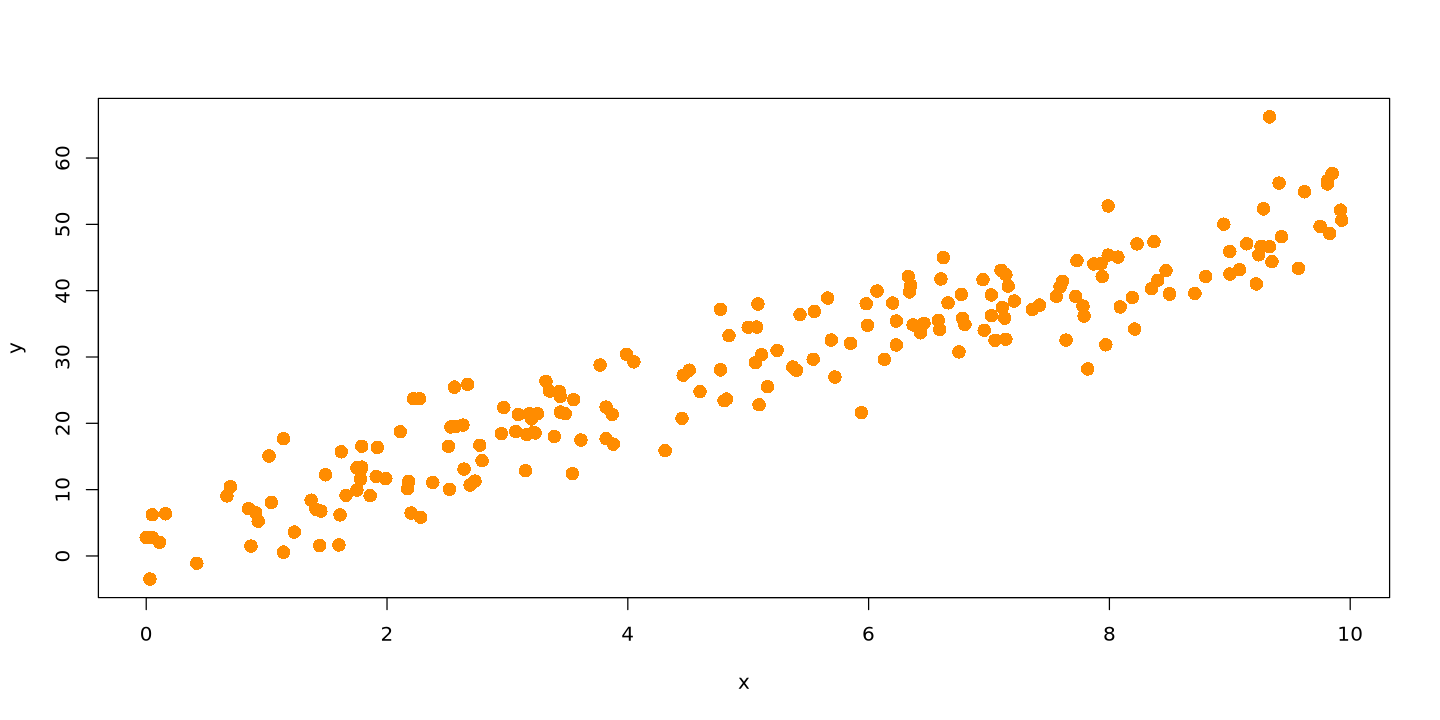

In [214]:
plot(y~x, pch = 16, col = "darkorange", cex = 1.5)

In [215]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3854  -3.3708  -0.4575   3.4099  17.2580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4279     0.7158   4.789 3.28e-06 ***
x             4.8786     0.1232  39.612  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.915 on 198 degrees of freedom
Multiple R-squared:  0.888,	Adjusted R-squared:  0.8874 
F-statistic:  1569 on 1 and 198 DF,  p-value: < 2.2e-16


* 잔차 그림을 그려보면...

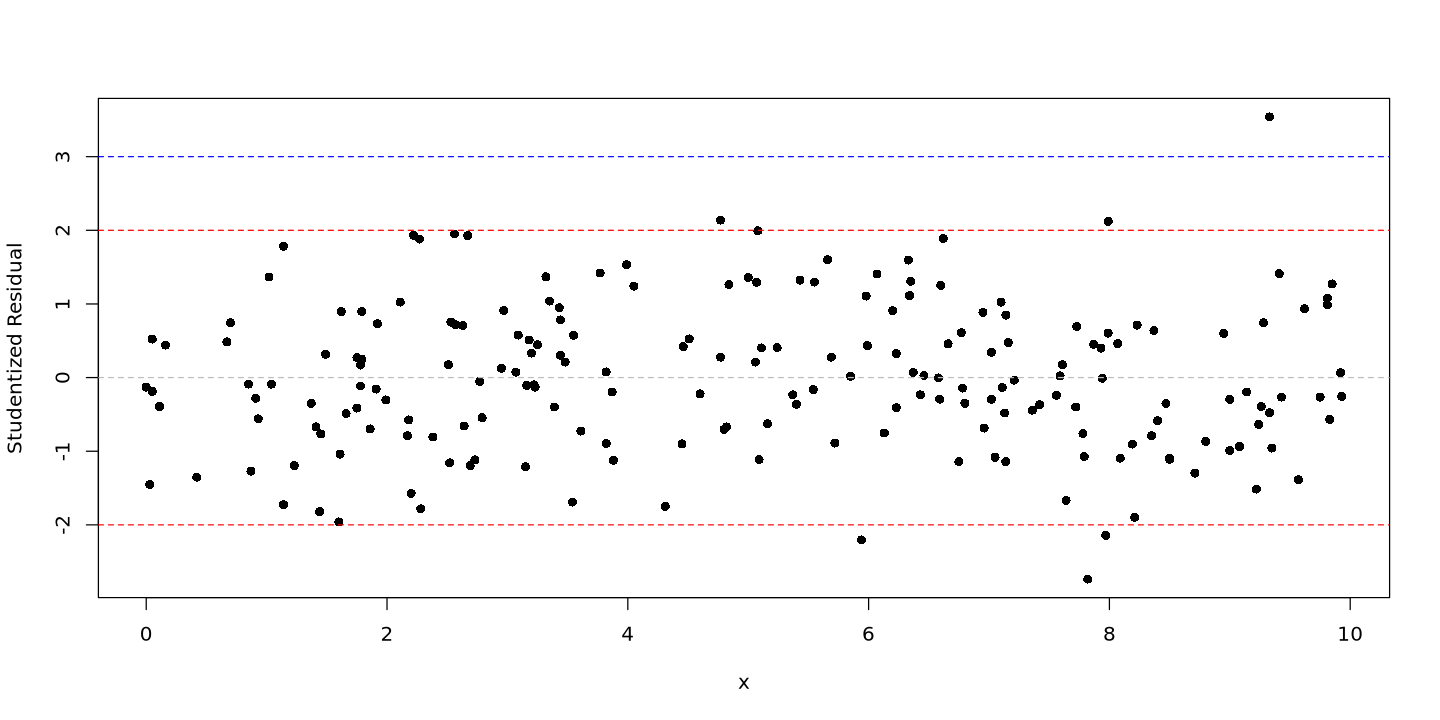

In [216]:
plot(rstandard(model) ~ x, pch = 16, ylab = "Studentized Residual")
abline(h = c(-3, -2, 0, 2, 3), col = c("blue", "red", "grey", "red", "blue"), lty = 2)

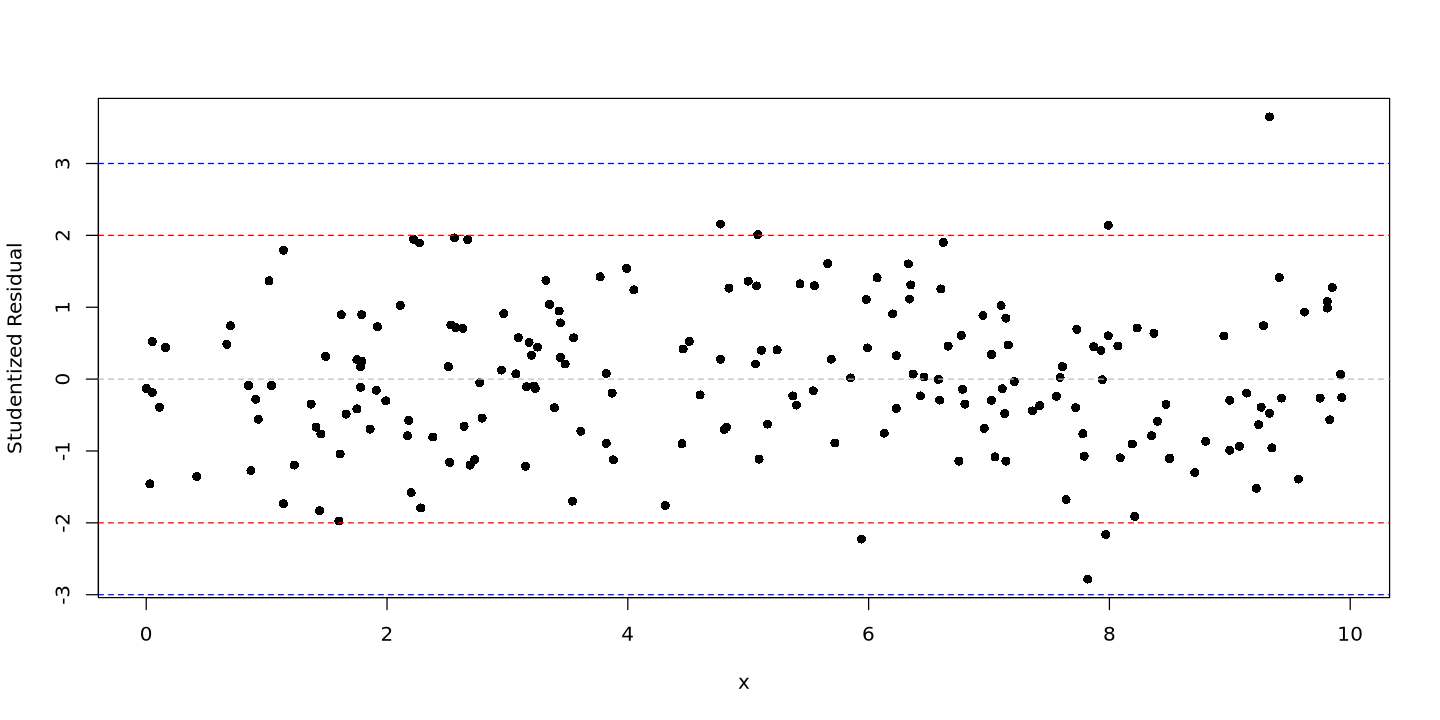

In [217]:
plot(rstudent(model) ~ x, pch = 16, ylab = "Studentized Residual")
abline(h = c(-3, -2, 0, 2, 3), col = c("blue", "red", "grey", "red", "blue"), lty = 2)

> ± 3을 벗어나는 값이 없어서 정규성 가정을 위반하지 않는 것 같음.

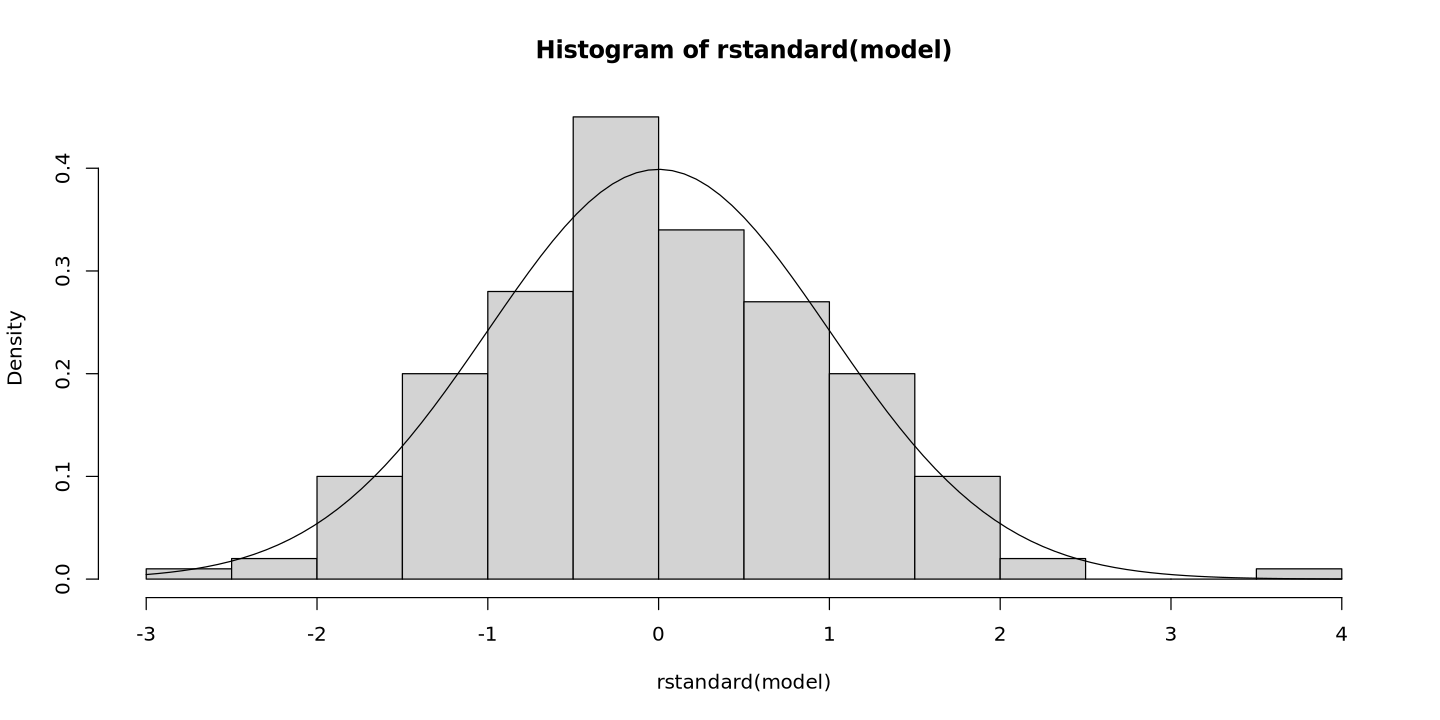

In [218]:
hist(rstandard(model), probability = TRUE)
curve(dnorm(x, 0, 1), add = TRUE)

> 잔차의 히스토그램을 그려봐도 정규분포로 보인다.

In [219]:
dwtest(model, alternative = "two.sided")


	Durbin-Watson test

data:  model
DW = 1.9892, p-value = 0.9359
alternative hypothesis: true autocorrelation is not 0


> 더빈왓슨 테스트 결과 귀무가설을 기각할 수 없다. 즉, 잔차의 1차 자기상관은 존재하지 않는다.

### E. 가정에 위배되는 경우 해결방법

`-` 1) 선형성 가정에 위배

$y = 3 + 0.9x^2 + \epsilon$

In [220]:
n = 200

x = runif(n, 0, 10) |> round(2)
epsilon = rnorm(n, 0, 5)

y = 3 + 0.9*x**2 + epsilon

In [222]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2957  -5.6879  -0.6995   5.6792  20.8345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.7705     1.1302  -10.41   <2e-16 ***
x             9.0461     0.2024   44.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.27 on 198 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9093 
F-statistic:  1997 on 1 and 198 DF,  p-value: < 2.2e-16


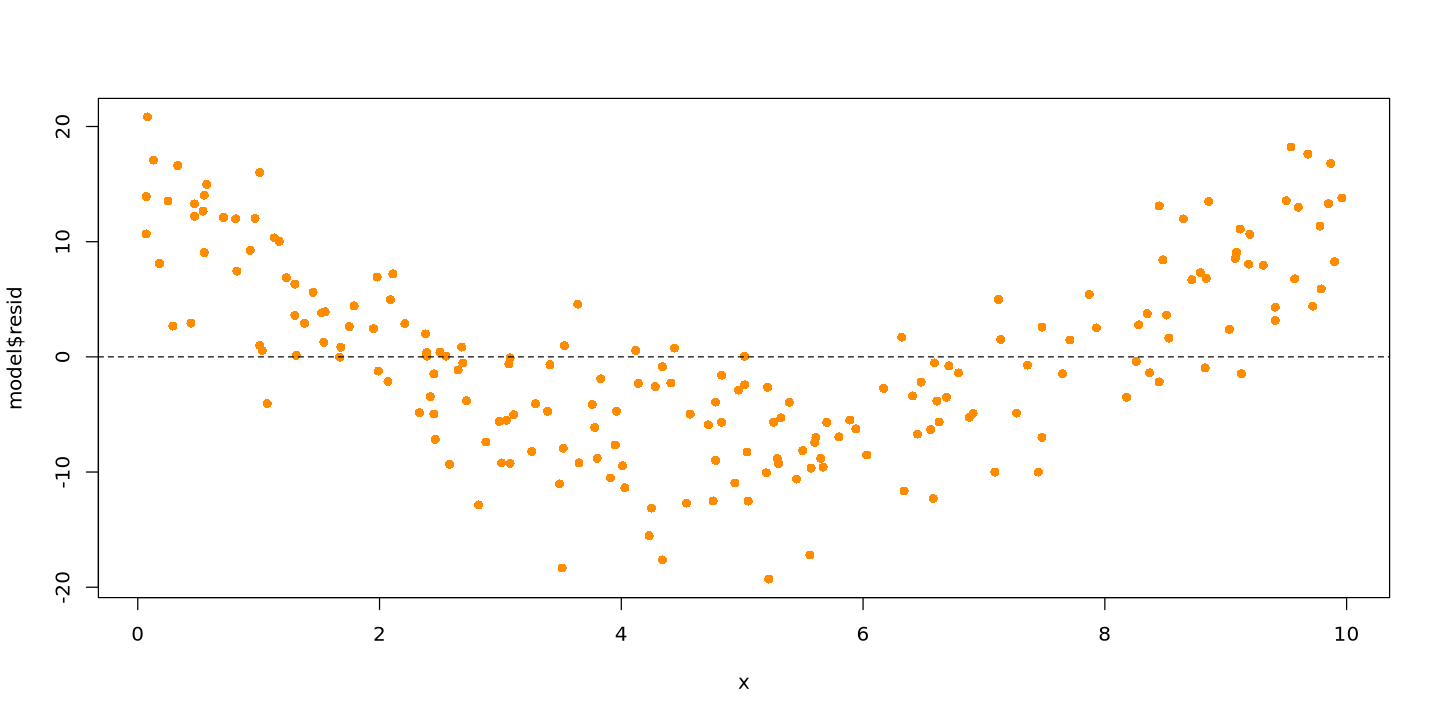

In [229]:
plot(model$resid~x, pch = 16, col = "darkorange")
abline(h = 0, lty = 2)

> 잔차 그림에 비선형 관계가 보이므로 회귀식을 다르게 가정하는 것이 좋아보임.

In [227]:
adj_model = lm(y~x + I(x^2))  ## as Is(), 있는 그대로 사용. xx로 할 시 교호작용을 고려한 것으로 취급
summary(adj_model)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8754  -2.7128   0.4307   3.3158  10.3561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.19272    0.94076   3.394 0.000833 ***
x            0.10637    0.43509   0.244 0.807125    
I(x^2)       0.89014    0.04187  21.261  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.568 on 197 degrees of freedom
Multiple R-squared:  0.9726,	Adjusted R-squared:  0.9723 
F-statistic:  3499 on 2 and 197 DF,  p-value: < 2.2e-16


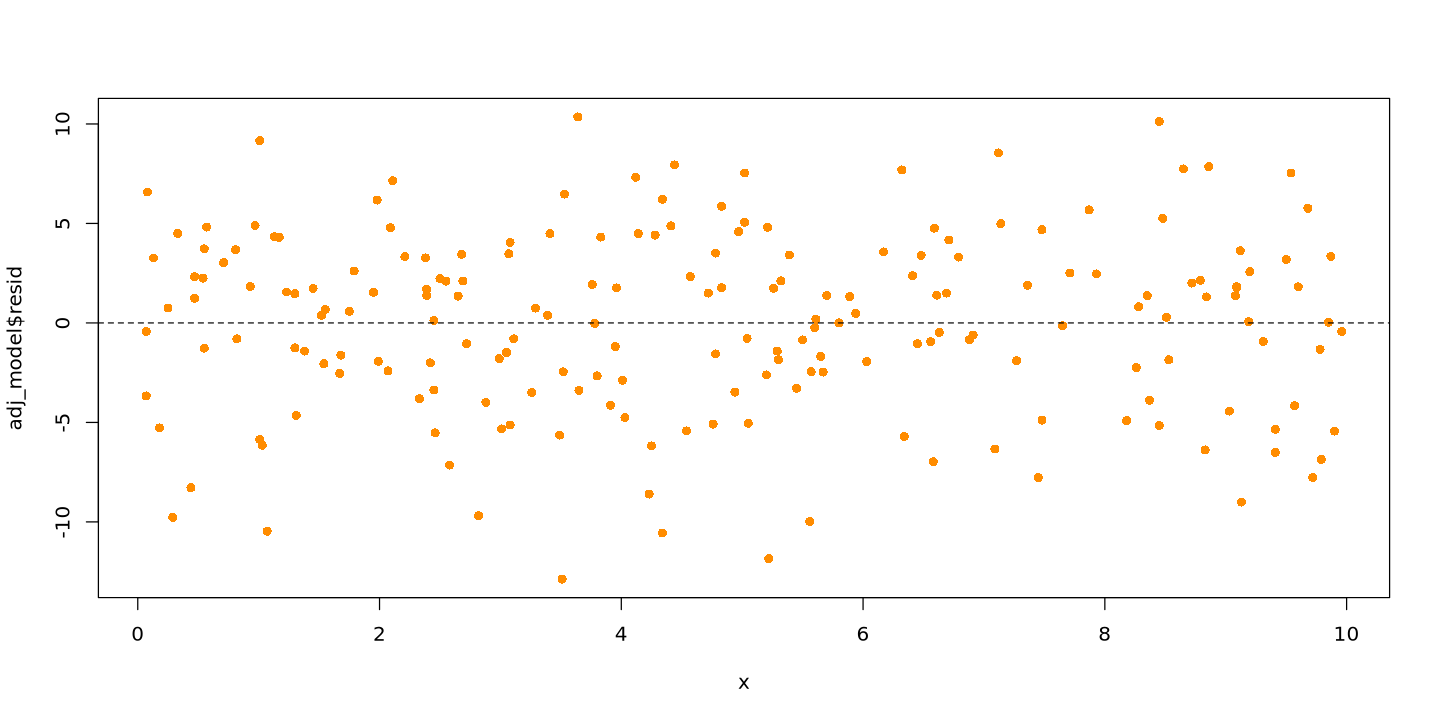

In [233]:
plot(adj_model$resid~x, pch = 16, col = "darkorange")
abline(h = 0, lty = 2)

`-` 2) 등분산성에 위배되는 경우

$y = 10 + 2x + \epsilon, ~~ \epsilon \sim N(0, x)$

In [272]:
n = 200

x = runif(n, 1, 10) |> round(2)
epsilon = rnorm(n, 0, sqrt(x))

y = 10 + 2*x + epsilon

In [273]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7650 -1.3794  0.0012  1.2801  5.7904 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.14259    0.38454   26.38   <2e-16 ***
x            1.91299    0.06186   30.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.28 on 198 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8276 
F-statistic: 956.4 on 1 and 198 DF,  p-value: < 2.2e-16


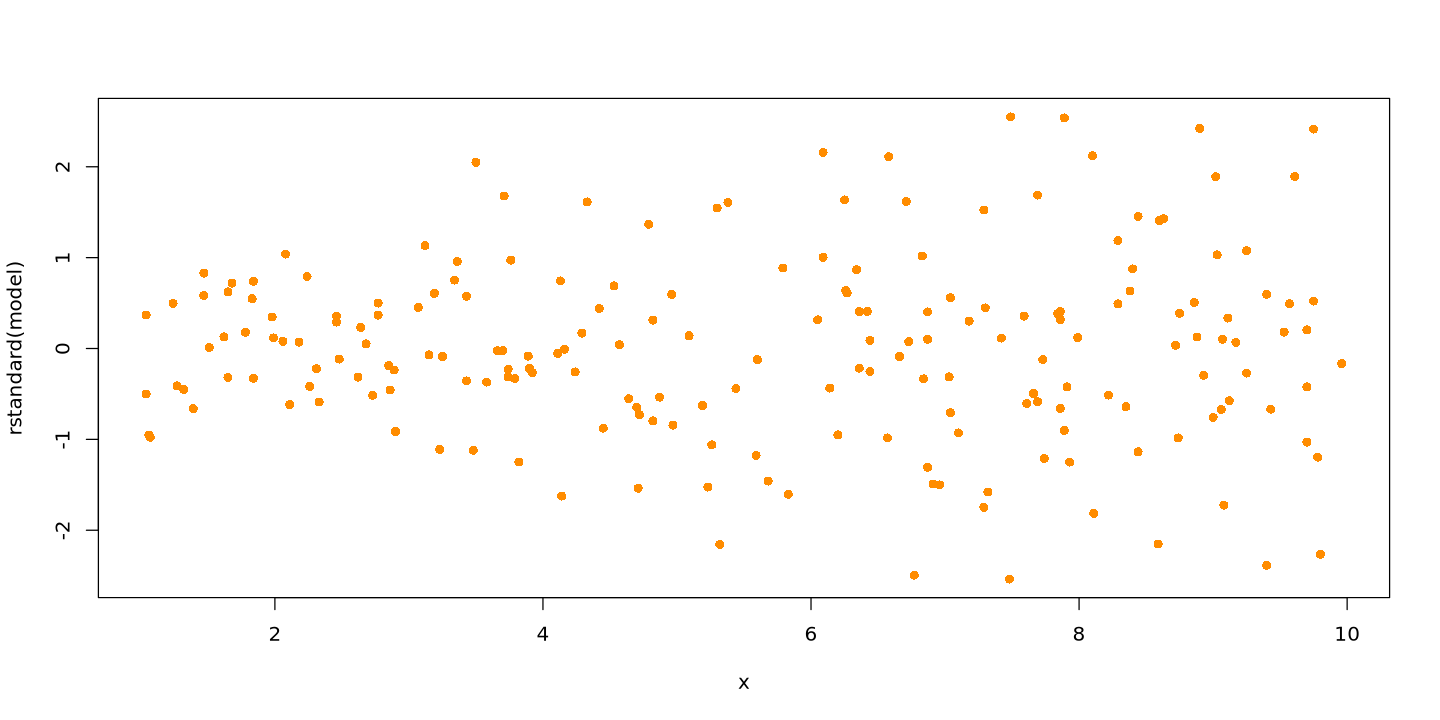

In [274]:
plot(rstandard(model)~x, pch = 16, col = "darkorange")

> 퍼져있는 잔차그림이 보일 경우, y값을 제곱근이나 로그변환을 한다.

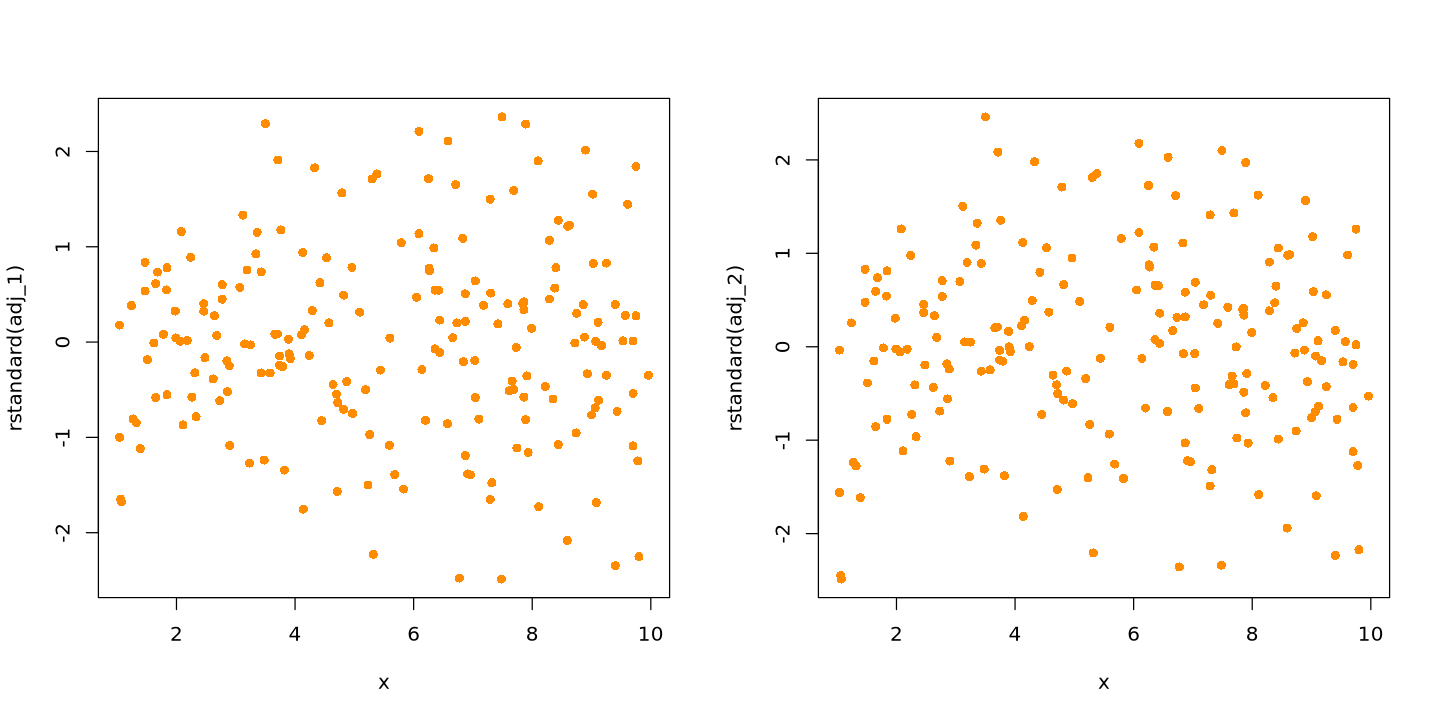

In [275]:
adj_1 = lm(sqrt(y)~x)
adj_2 = lm(log(y)~x)

par(mfrow = c(1,2))
plot(rstandard(adj_1)~x, pch = 16, col = "darkorange")
plot(rstandard(adj_2)~x, pch = 16, col = "darkorange")

In [276]:
summary(adj_2)


Call:
lm(formula = log(y) ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.267821 -0.070386 -0.000113  0.070347  0.266557 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.466818   0.018348  134.44   <2e-16 ***
x           0.095508   0.002952   32.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1088 on 198 degrees of freedom
Multiple R-squared:  0.841,	Adjusted R-squared:  0.8402 
F-statistic:  1047 on 1 and 198 DF,  p-value: < 2.2e-16


> 이분산성이 해소되고 모델의 성능이 개선될 수 있다.

`-` 3) 정규성에 위배되는 경우

$y = 3 + 0.9x + \epsilon, ~~ \epsilon \sim t(2)$

In [331]:
n = 200

x = runif(n, 0, 10) |> round(2)
epsilon = rt(n, 2)

y = 3 + 0.9*x + epsilon

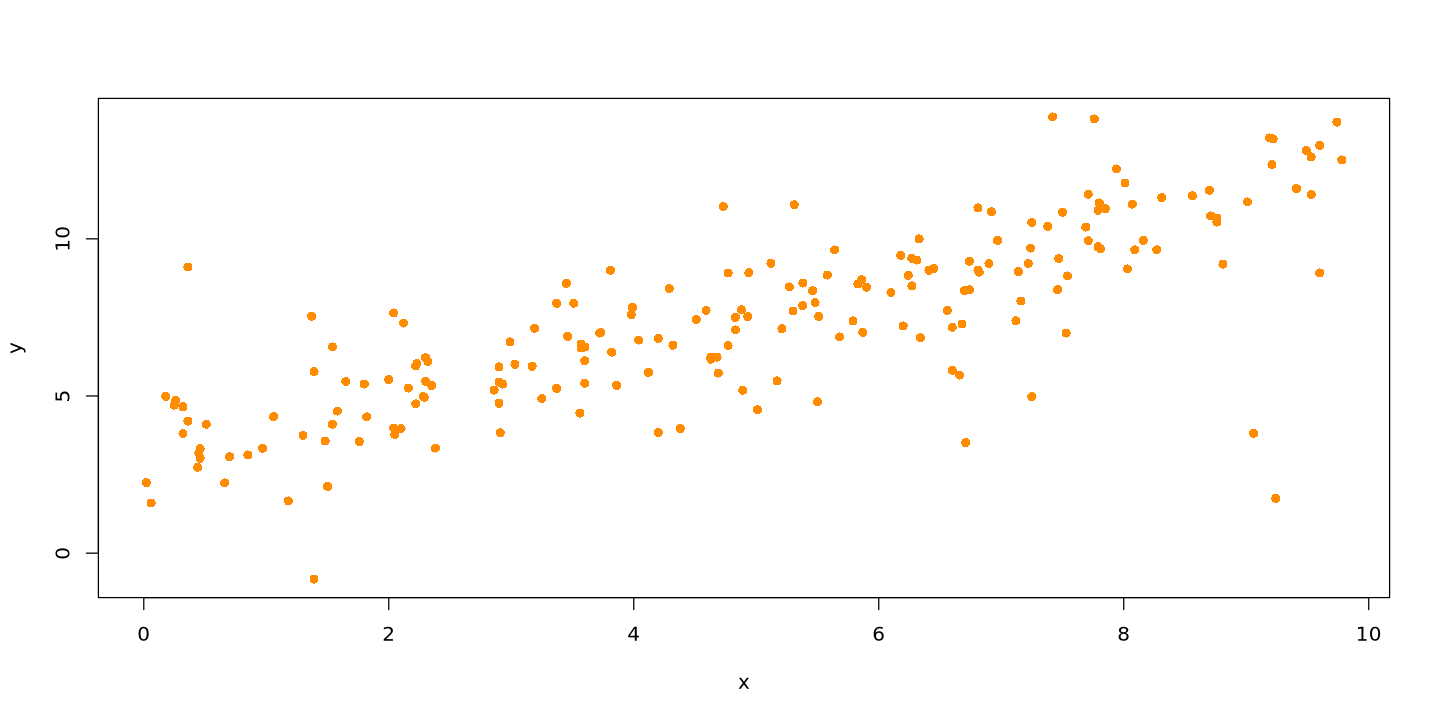

In [332]:
plot(y~x, pch = 16, col = "darkorange")

> 이상치가 가끔 튀어나오는 것을 제외하고는 별 문제가 없어보인다. 따라서 따로 검증이 필요

In [333]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2466 -0.8653  0.1314  0.9677  5.5257 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.27841    0.25736   12.74   <2e-16 ***
x            0.83430    0.04609   18.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.743 on 198 degrees of freedom
Multiple R-squared:  0.6234,	Adjusted R-squared:  0.6215 
F-statistic: 327.7 on 1 and 198 DF,  p-value: < 2.2e-16


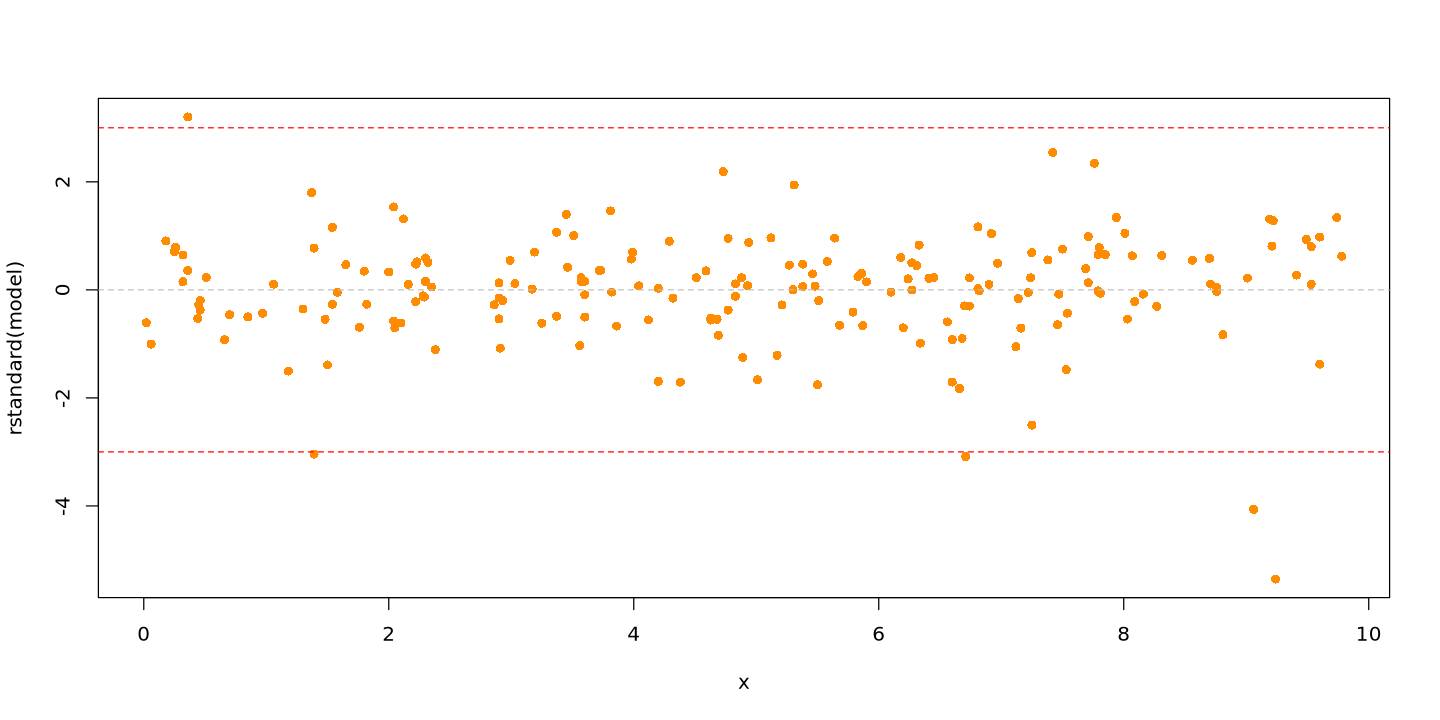

In [334]:
plot(rstandard(model)~x, pch = 16, col = "darkorange")
abline(h = c(-3, 0, 3), col = c("red", "grey", "red"), lty = 2)

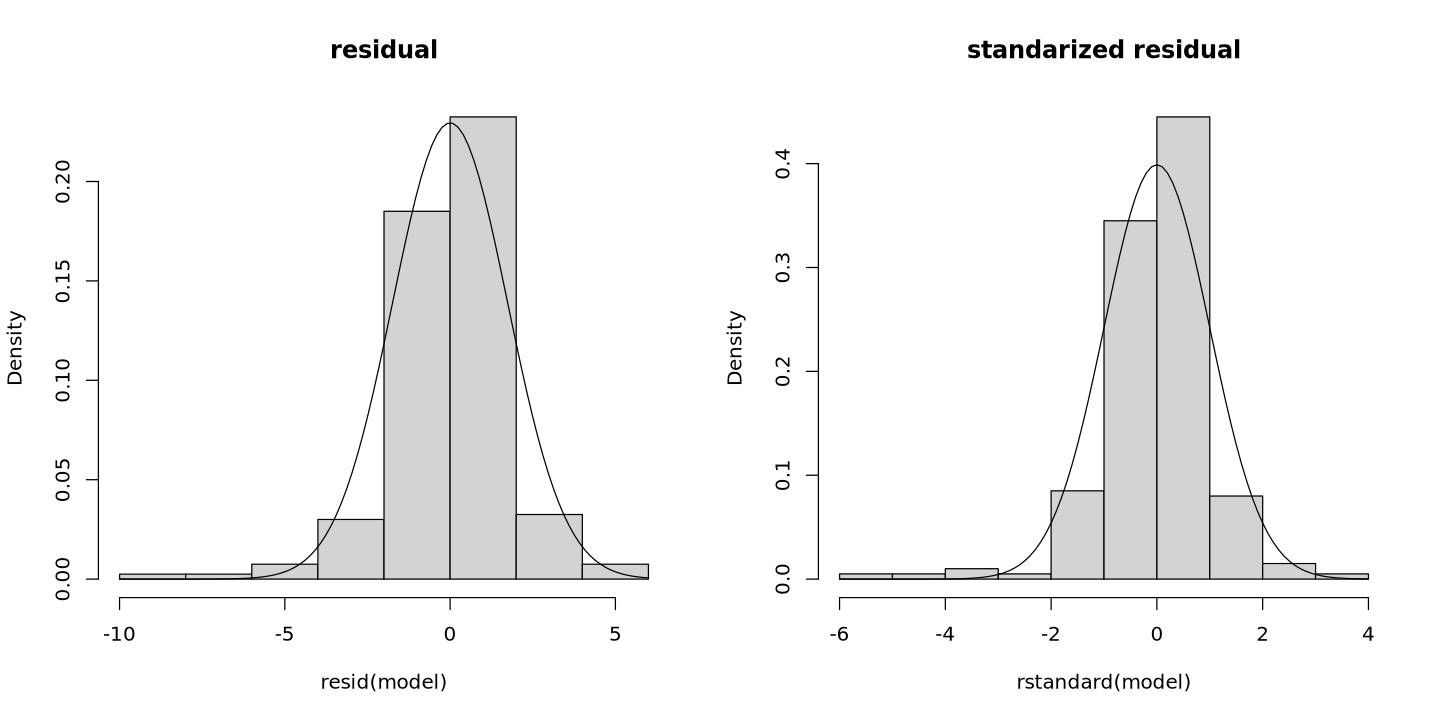

In [335]:
par(mfrow = c(1,2))
hist(resid(model), probability = TRUE, main = "residual")
curve(dnorm(x, 0, sd(resid(model))), add = TRUE)
hist(rstandard(model), probability = TRUE, main = "standarized residual")
curve(dnorm(x, 0, 1), add = TRUE)

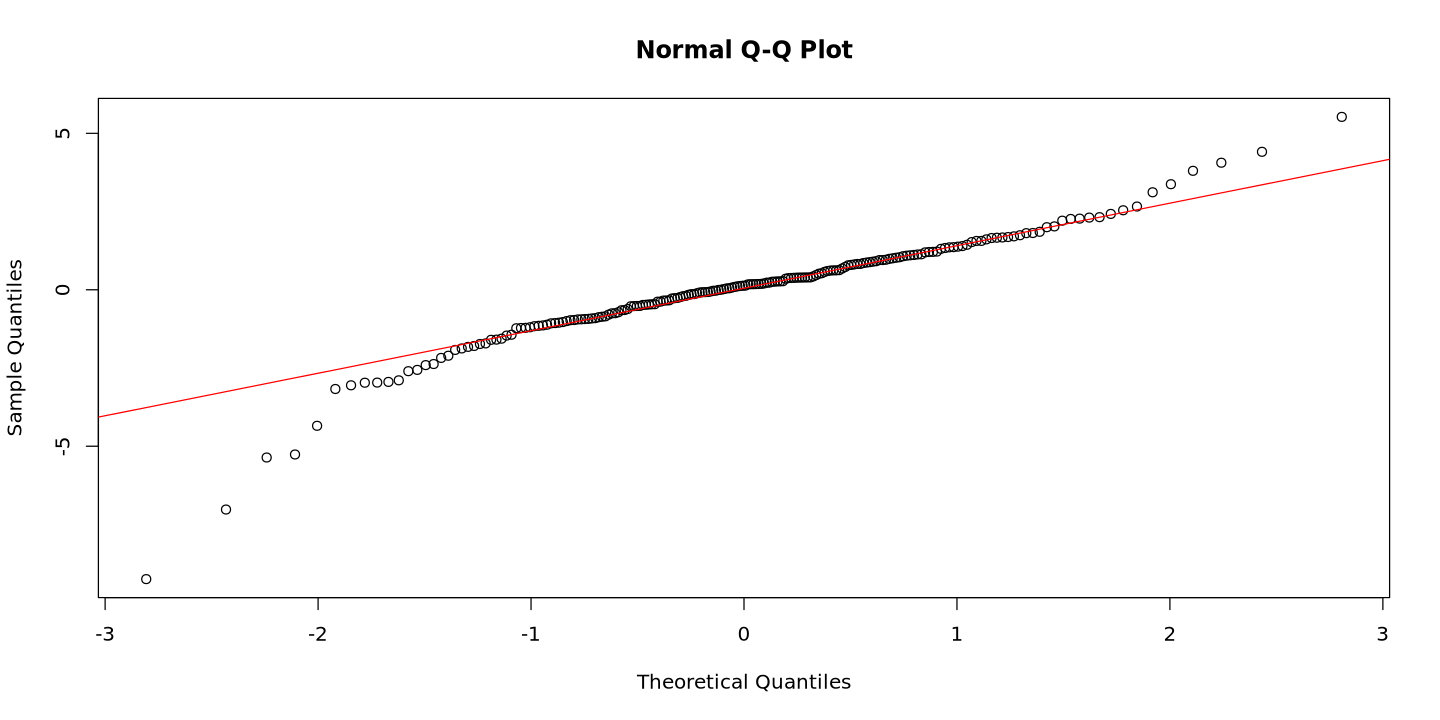

In [336]:
qqnorm(resid(model))
qqline(resid(model), col = "red")

> Sample Quantile의 값들이 더 낮게 형성된다. 즉, 정규분포보다 양쪽 꼬리가 두꺼움을 알 수 있다.

In [337]:
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.92052, p-value = 6.361e-09


* 이상치의 제거

In [338]:
which(abs(rstandard(model)) > 3)

53  76 170 172 191 
 53  76 170 172 191

In [340]:
x_2 = x[-which(abs(rstandard(model)) > 3)]  ## 해당하는 것 제거
y_2 = y[-which(abs(rstandard(model)) > 3)]

In [341]:
adj_model = lm(y_2~x_2)
summary(adj_model)


Call:
lm(formula = y_2 ~ x_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6056 -0.7976  0.0212  0.8367  4.1404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.07868    0.20934   14.71   <2e-16 ***
x_2          0.89754    0.03767   23.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.388 on 193 degrees of freedom
Multiple R-squared:  0.7463,	Adjusted R-squared:  0.745 
F-statistic: 567.7 on 1 and 193 DF,  p-value: < 2.2e-16


In [342]:
shapiro.test(resid(adj_model))


	Shapiro-Wilk normality test

data:  resid(adj_model)
W = 0.98786, p-value = 0.09448


`-` 4) 독립성을 만족하지 못하는 경우

In [343]:
n = 200
x = runif(n, 0, 10) |> round(2) |> sort()
epsilon = c(rnorm(1,0,0.1))

for (k in 2:n) {
    epsilon[k] = 0.5 * epsilon[k-1] + rnorm(1)
}

y = 3 + 0.9*x + epsilon

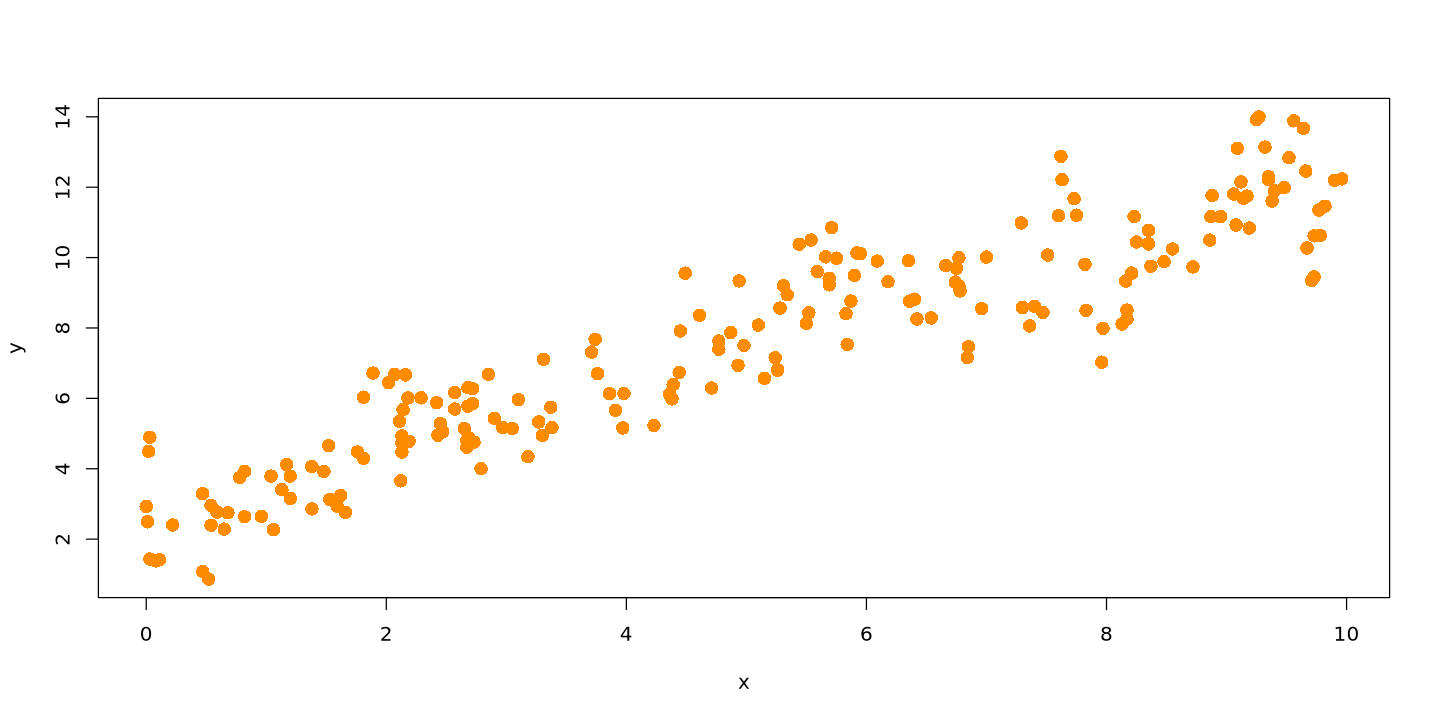

In [344]:
plot(y~x, pch = 16, cex = 1.5, col = "darkorange")

In [345]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3402 -0.8056 -0.0459  0.7867  2.8337 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.71941    0.16338   16.64   <2e-16 ***
x            0.96093    0.02796   34.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.19 on 198 degrees of freedom
Multiple R-squared:  0.8565,	Adjusted R-squared:  0.8557 
F-statistic:  1181 on 1 and 198 DF,  p-value: < 2.2e-16


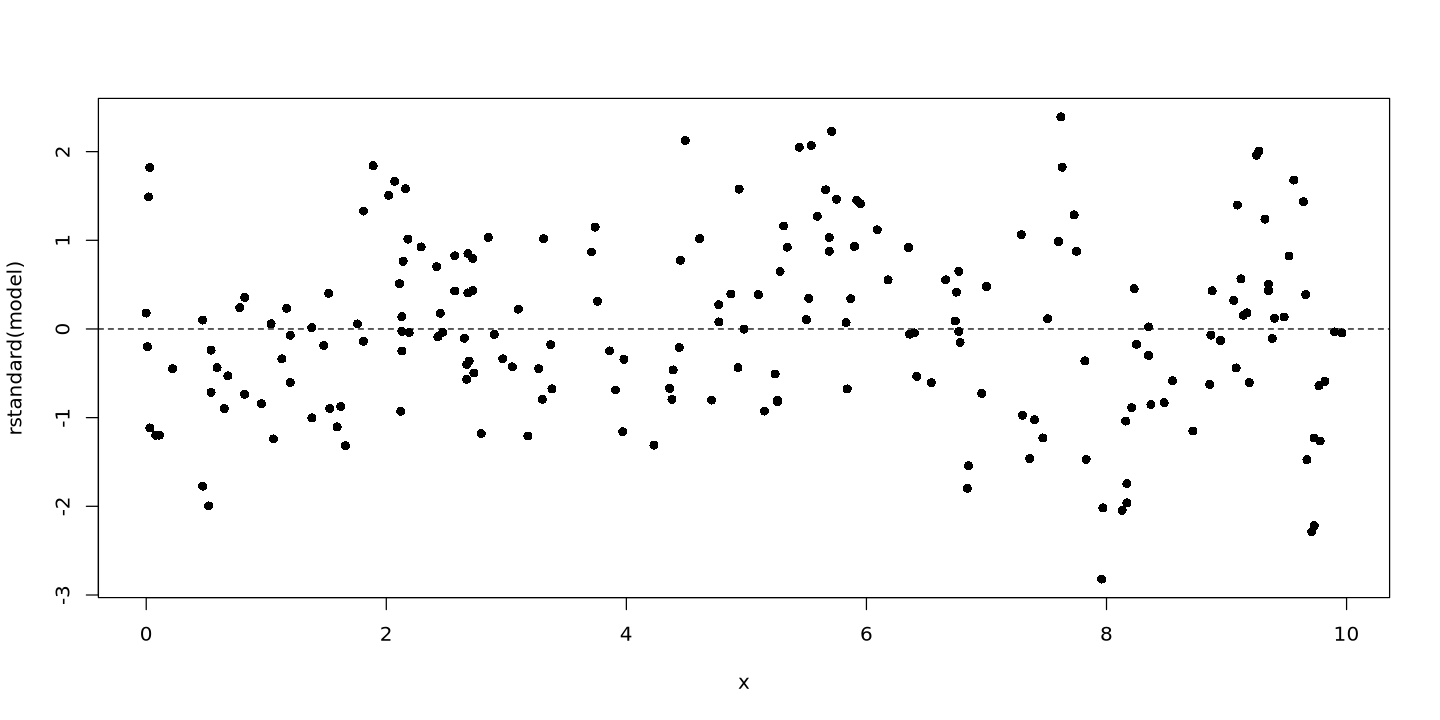

In [347]:
plot(rstandard(model)~x, pch = 16)
abline(h = 0, lty = 2)

In [348]:
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.99439, p-value = 0.6591


> 겉보기에는 별다른 문제가 없어 보인다...

In [349]:
lmtest::dwtest(model, alternative = "two.sided")


	Durbin-Watson test

data:  model
DW = 0.80194, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


> 하지만 잔차는 1차 양의 상관을 지닌다.

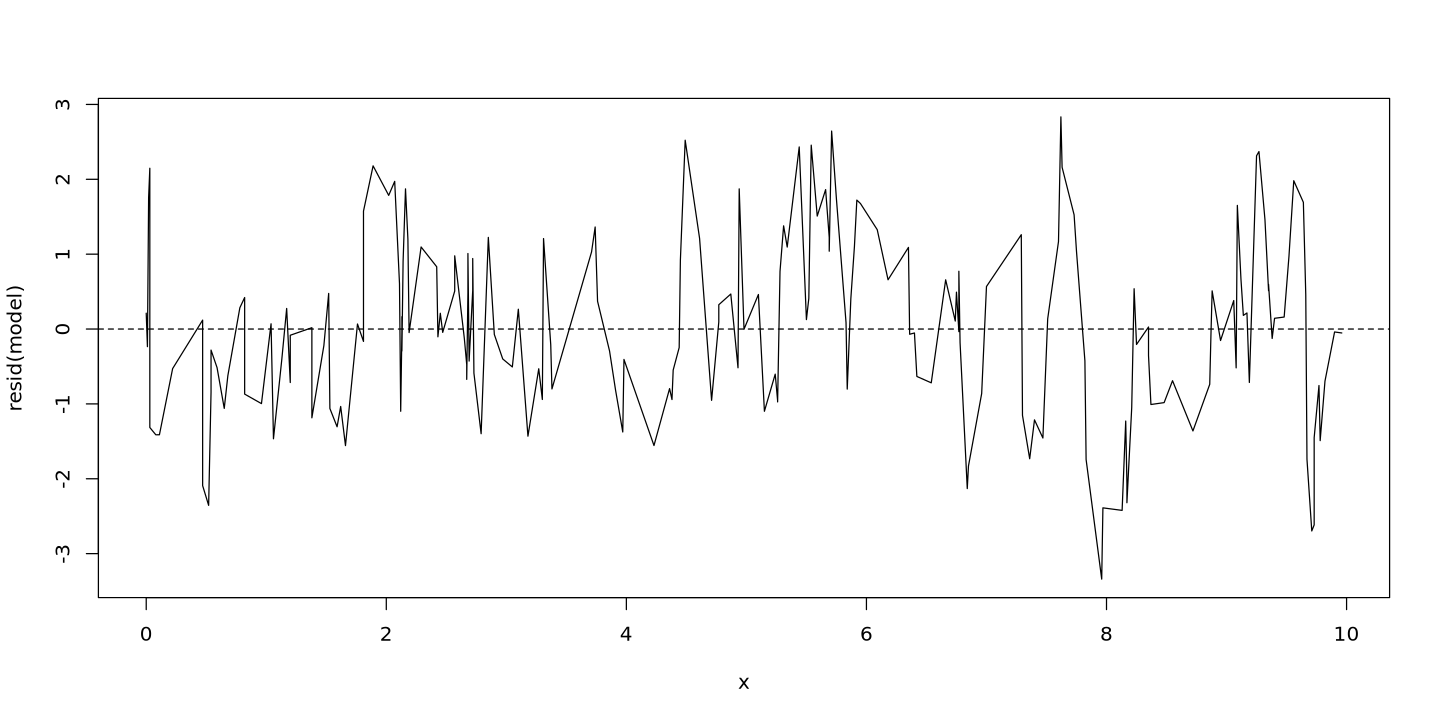

In [351]:
plot(resid(model)~x, type = "l")
abline(h = 0, lty = 2)

> 이렇게 봐도 패턴은 솔직히 잘 알수는 없다...